In [29]:
# importing libraries
import numpy as np
import pandas as pd

In [30]:
data = pd.read_csv('Task2_Data.csv')
data.head()

,CustomerID,Name,Gender,Age,Annual Income (k$),Spending Score (1-100),Address,Occupation,City
0,1,Luis Jackson,Male,19,15,39,"7294 Scott Harbor Apt. 602\nNorth Tammytown, W...","Teacher, music",Brandonshire
1,2,Nicole Cruz,Male,21,15,81,"67557 Moody Roads\nLake Johnshire, PW 59047",Product manager,Ariasstad
2,3,Linda Brooks,Female,20,16,6,"090 Hancock Highway\nSouth Patriciaview, DC 65170",Sub,North Shaneville
3,4,Steven Morgan,Female,23,16,77,"6532 Amanda Mission Apt. 406\nHollyburgh, RI 9...",Administrator,Lake Rebecca
4,5,Kelly Evans,Female,31,17,40,"27141 Lawrence Plains\nGaryfurt, WV 94124",Occupational therapist,Adamsborough


In [31]:
# dropping unnecessary columns
data.drop(['CustomerID','Name','Address','Occupation','City'], axis=1, inplace=True)

# converting categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data.columns:
    if i not in ['Age']:
        data[i] = le.fit_transform(data[i])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,0,38
1,1,21,0,80
2,0,20,1,5
3,0,23,1,76
4,0,31,2,39


# Implementing K-means clustering

In [32]:
# The number of clusters are 3

# K-Means Clustering without using Scikit-Learn
# Step 1: Randomly select k points from the dataset which will be the initial centroids
# Step 2: Assign all the points to the closest cluster centroid
# Step 3: Recompute the centroids of newly formed clusters
# Step 4: Repeat Step 2 and 3

In [33]:
# Step 1: Randomly select k points from the dataset which will be the initial centroids
# randomly selecting 3 points from the dataset
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(3)
}
centroids

{1: [10, 75], 2: [7, 6], 3: [43, 11]}

In [34]:
colmap = {1: 'r', 2: 'g', 3: 'b'}

# Step 2: Assign all the points to the closest cluster centroid
# assigning the points to the closest cluster centroid
def assignment(data, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        data['distance_from_{}'.format(i)] = (
            np.sqrt(
                (data['Age'] - centroids[i][0]) ** 2
                + (data['Annual Income (k$)'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    data['closest'] = data.loc[:, centroid_distance_cols].idxmin(axis=1)
    data['closest'] = data['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    data['color'] = data['closest'].map(lambda x: colmap[x])
    return data

data = assignment(data, centroids)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),distance_from_1,distance_from_2,distance_from_3,closest,color
0,1,19,0,38,75.538070,13.416408,26.400758,2,g
1,1,21,0,80,75.802375,15.231546,24.596748,2,g
2,0,20,1,5,74.672619,13.928388,25.079872,2,g
3,0,23,1,76,75.133215,16.763055,22.360680,2,g
4,0,31,2,39,75.960516,24.331050,15.000000,3,b


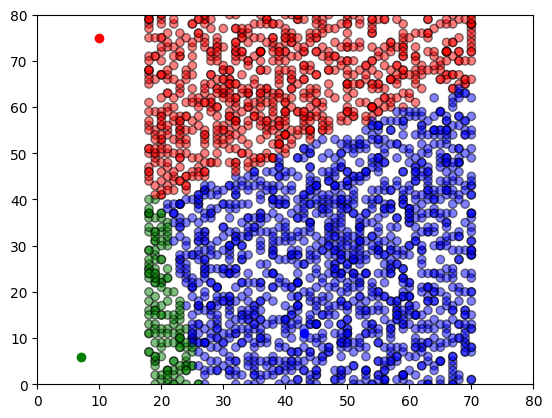

In [35]:
# Step 3: Recompute the centroids of newly formed clusters
import matplotlib.pyplot as plt
plt.scatter(data['Age'], data['Annual Income (k$)'], color=data['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

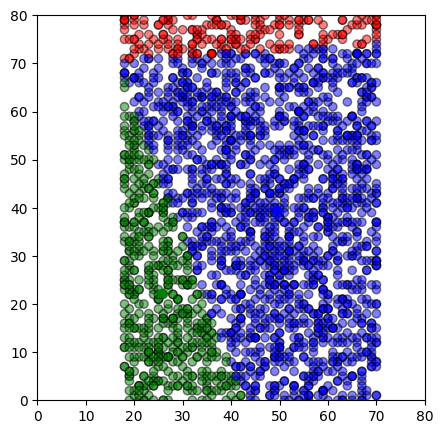

In [38]:
# Step 4: Repeat Step 2 and 3
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(data[data['closest'] == i]['Age'])
        centroids[i][1] = np.mean(data[data['closest'] == i]['Annual Income (k$)'])
    return k

centroids = update(centroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(data['Age'], data['Annual Income (k$)'], color=data['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()